## L11 - Web scraping + machine learning in 15 minutes

<img src="http://imgs.xkcd.com/comics/correlation.png">

This laboratory introduces two concepts:
* How to download and process (scrape) more efficiently webpages
* How to do simple text classification
, which might be useful for your final project

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
%load_ext soup

Monkey patch BeautifulSoup with custom rendering
See `configure_ipython_beautifulsoup?` for configuration information
Push 'BeautifulSoup' from 'bs4' into current context
Push 'urlopen' from 'urllib2' into current context
Push 'p' shortcut into current context
Push 'requests' into current context


## BeautifulSoup

Basic usage (adopted from the **excellent** original documentation at https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


In [2]:
import urllib2

In [3]:

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc)

/Users/kudkudak/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
soup.html.body

<body>\n<p class="title"><b>The Dormouse's story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>\n<p class="story">...</p>\n</body>

In [5]:
list(soup.html.body.children)

[u'\n',
 <p class="title"><b>The Dormouse's story</b></p>,
 u'\n',
 <p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 u'\n',
 <p class="story">...</p>,
 u'\n']

### What you get is a navigable tree!

<img src="img/11/dom.png">

### Example: finding concert tickes

Inspired by http://predictablynoisy.com/querying-craigslist-with-python/

In [6]:
## We will find all listings with word concert, probably ticket do buy (but not always)
BASE_URL = ('http://chicago.craigslist.org/search/sss?query={}&sort=rel')
search_term = "concert"
results = []
search_term = search_term.strip().replace(' ', '+')
search_url = BASE_URL.format(search_term)
soup = BeautifulSoup(urlopen(search_url).read())

In [7]:
content =  soup.find('div', 'content')

In [8]:
len(list(content.children))

7

In [9]:
content.prettify()[0:1000]

u'<div class="content" id="sortable-results">\n <section class="favlistsection">\n  <section class="favlistinfo">\n  </section>\n  <section class="banishlistinfo">\n  </section>\n </section>\n <div class="rows">\n  <p class="row" data-pid="5590744626">\n   <a class="i gallery" data-ids="1:00C0C_cyn5m2Jbkw5,1:00G0G_a1NaV7x1K95,1:00Q0Q_3I21yQ5sRKL,1:00d0d_iZJtlcmIHHm,1:00q0q_VdIhbRe9hC,1:00u0u_kpMlSTo1WvH,1:00c0c_5w9z6j9JCHC,1:00808_jZs7eubo7nC,1:00p0p_etUVg7A1Tts,1:00T0T_3fGfXC6PIzt,1:00B0B_hdkdLEtA3UO" href="/wcl/msd/5590744626.html">\n    <span class="price">\n     $579\n    </span>\n   </a>\n   <span class="txt">\n    <span class="pl">\n     <span class="icon icon-star" role="button">\n      <span class="screen-reader-text">\n       __("favorite this post") ?&gt;\n      </span>\n     </span>\n     <time datetime="2016-06-09 11:35" title="Thu 09 Jun 11:35:08 AM">\n      Jun 9\n     </time>\n     <a class="hdrlnk" data-id="5590744626" href="/wcl/msd/5590744626.html">\n      <span id="t

In [10]:
rows = content.find_all('p', 'row') # find <p class="row" *>

In [11]:
rows[0:1]

[<p class="row" data-pid="5590744626"> <a class="i gallery" data-ids="1:00C0C_cyn5m2Jbkw5,1:00G0G_a1NaV7x1K95,1:00Q0Q_3I21yQ5sRKL,1:00d0d_iZJtlcmIHHm,1:00q0q_VdIhbRe9hC,1:00u0u_kpMlSTo1WvH,1:00c0c_5w9z6j9JCHC,1:00808_jZs7eubo7nC,1:00p0p_etUVg7A1Tts,1:00T0T_3fGfXC6PIzt,1:00B0B_hdkdLEtA3UO" href="/wcl/msd/5590744626.html"><span class="price">$579</span></a> <span class="txt"> <span class="pl"> <span class="icon icon-star" role="button"> <span class="screen-reader-text"> __("favorite this post") ?&gt;</span> </span> <time datetime="2016-06-09 11:35" title="Thu 09 Jun 11:35:08 AM">Jun 9</time> <a class="hdrlnk" data-id="5590744626" href="/wcl/msd/5590744626.html"><span id="titletextonly">S6 Original Slim Concert Hall GT Acoustic/Electric Guitar</span></a> </span> <span class="l2"> <span class="price">$579</span> <span class="pnr"> <small> (lisle)</small> <span class="px"> <span class="p"> pic <span class="maptag" data-pid="5590744626">map</span></span></span> </span> </span> <span class="js-only banish-unbanish"> <span class="banish" title="hide"><span class="icon icon-trash" role="button"></span><span class="screen-reader-text">hide this posting</span></span> <span class="unbanish" title="restore"><span class="icon icon-trash red" role="button"></span><span class="screen-reader-text">restore this posting</span></span></span> </span> </p>]

In [17]:
rows[0].find("time")

<time datetime="2016-06-09 11:35" title="Thu 09 Jun 11:35:08 AM">Jun 9</time>

In [18]:
for row in rows:
    url = 'http://chicago.craigslist.org' + row.a['href']
    create_date = row.find('time')['datetime']
    title = row.find_all('a')[1].get_text() # First is image
    results.append({'url': url, 'create_date': create_date, 'title': title})

In [19]:
results[0:10]

[{'create_date': '2016-06-09 11:35',
  'title': u'S6 Original Slim Concert Hall GT Acoustic/Electric Guitar',
  'url': 'http://chicago.craigslist.org/wcl/msd/5590744626.html'},
 {'create_date': '2016-06-09 11:32',
  'title': u'La Patrie Concert Classical Guitar',
  'url': 'http://chicago.craigslist.org/wcl/msd/5617718254.html'},
 {'create_date': '2016-06-05 10:36',
  'title': u'COLDPLAY TICKETS \u2605 PRIME CONCERT SEATS - MUST SELL - JUST RELEASED!',
  'url': 'http://chicago.craigslist.org/chc/tid/5620603386.html'},
 {'create_date': '2016-06-03 10:02',
  'title': u'ADELE TICKETS \u2605 PRIME CONCERT SEATS - MUST SELL - GREAT DEALS!',
  'url': 'http://chicago.craigslist.org/chc/tid/5617507185.html'},
 {'create_date': '2016-06-10 00:25',
  'title': u'The Cure 1 ticket to concert June 11',
  'url': 'http://chicago.craigslist.org/chc/tix/5628331140.html'},
 {'create_date': '2016-06-10 00:03',
  'title': u'wanted IRON MAIDEN or Rock Concert tshirts and misc.',
  'url': 'http://chicago.crai

In [22]:
soup = BeautifulSoup(urllib2.urlopen("http://chicago.craigslist.org/chc/clo/5564447352.html").read())

In [23]:
help(soup.find)

Help on method find in module bs4.element:

find(self, name=None, attrs={}, recursive=True, text=None, **kwargs) method of bs4.BeautifulSoup instance
    Return only the first child of this Tag matching the given
    criteria.



In [24]:
list(soup.html.children)[3]

<body class="posting en">\n<script type="text/javascript"><!--\n    function C(k){return(document.cookie.match('(^|; )'+k+'=([^;]*)')||0)[2]}\n    var pagetype, pagemode;\n    (function(){\n        var h = document.documentElement;\n        h.className = h.className.replace('no-js', 'js');\n        var b = document.body;\n        var bodyClassList = b.className.split(/\\s+/);;\n        pagetype = bodyClassList[0]; // dangerous assumption\n        var fmt = C('cl_fmt');\n        if ( fmt === 'regular' || fmt === 'mobile' ) {\n            pagemode = fmt;\n        } else if (screen.width <= 480) {\n            pagemode = 'mobile';\n        } else {\n            pagemode = 'regular';\n        }\n        pagemode = pagemode === 'mobile' ? 'mobile' : 'desktop';\n        bodyClassList.push(pagemode);\n        if (C('hidesearch') === '1' && pagemode !== 'mobile') {\n            bodyClassList.push('hide-search');\n        }\n        var width = window.innerWidth || document.documentElement.clientWidth;\n        if (width > 1000) { bodyClassList.push('w1024'); }\n        if (typeof window.sectionBase !== 'undefined') {\n            var mode = (decodeURIComponent(C('cl_tocmode') || '').match(new RegExp(window.sectionBase + ':([^,]+)', 'i')) || {})[1] || window.defaultView;\n            if (mode) {\n                bodyClassList.push(mode);\n            }\n        }\n        b.className = bodyClassList.join(' ');\n    }());\n--></script>\n<section id="pagecontainer">\n<div class="bglogo"></div>\n<header class="global-header">\n<a class="header-logo" href="/">CL</a>\n<nav class="breadcrumbs-container">\n<ul class="breadcrumbs">\n<li class="crumb area">\n<p>\n<a href="/">chicago</a>\n<span class="breadcrumb-arrow">&gt;</span>\n</p>\n</li>\n<li class="crumb subarea">\n<p>\n<a href="/chc/">city of chicago</a>\n<span class="breadcrumb-arrow">&gt;</span>\n</p>\n</li>\n<li class="crumb section">\n<p>\n<a href="/sss">for sale</a>\n<span class="breadcrumb-arrow">&gt;</span>\n</p>\n</li>\n<li class="crumb category">\n<p>\n<a href="/clo">clothing &amp; accessories - by owner</a>\n</p>\n</li>\n<li class="crumb no-js">\n<input type="submit" value="go"/>\n</li>\n</ul>\n</nav>\n<div class="userlinks">\n<ul class="user-actions">\n<li class="user post">\n<a href="https://post.craigslist.org/c/chi">post</a>\n</li>\n<li class="user account">\n<a href="https://accounts.craigslist.org/login/home">account</a>\n</li>\n</ul>\n<ul class="user-favs-discards">\n<li class="user">\n<div class="favorites">\n<a class="favlink" href="#"><span aria-hidden="true" class="icon icon-star fav"></span><span class="fav-number">0</span><span class="fav-label"> favorites</span></a>\n</div>\n</li>\n<li class="user discards">\n<div>\n<span aria-hidden="true" class="icon icon-trash red"></span><span class="hidden_count linklike withmap"></span><span class="hidden_count linklike nomap"></span><span class="discards-label linklike"> hidden</span>\n</div>\n</li>\n</ul>\n</div>\n</header>\n<section class="body">\n<br/>\n<br/>\n<div id="userbody">\n<div class="prevnext js-only">\n<a class="prev">\u25c0  prev </a>\n<a class="backup" title="back to search">\u25b2</a>\n<a class="next"> next \u25b6 </a>\n</div>\n<span id="has_been_removed"></span>\n<div class="removed">\n<h2>This posting has expired.</h2>\n<h5>(The title on the listings page will be removed in just a few minutes.)</h5>\n</div>\n</div>\n<br/>\n</section>\n<footer>\n<ul class="clfooter">\n<li>\xa9 2016 <span class="desktop">craigslist</span><span class="mobile">CL</span></li>\n<li><a href="//www.craigslist.org/about/help/">help</a></li>\n<li><a href="//www.craigslist.org/about/scams">safety</a></li>\n<li class="desktop"><a href="//www.craigslist.org/about/privacy.policy">privacy</a></li>\n<li class="desktop"><a href="https://forums.craigslist.org/?forumID=8">feedback</a></li>\n<li class="desktop"><a href="//www.craigslist.org/about/craigslist_is_hiring">cl jobs</a></li>\n<li><a href="//www.craigslist.org/about/terms.of.use.en">

In [25]:
soup.find_all(name="span", attrs={"id": "titletextonly"})

Index,Render,source


## Exercise 1, Band detector, 3 points

Write a function that takes as input listing and returns band name (for instance Megadeth, if this is actually a ticket for a specific band concert). Test it on 10 listings
of your choice.

Tips:
    * Make sure you standardize listing text and band name
    * You can explicitely search for tickets on craiglists
    * You will need a list of artits, this should do: http://labrosa.ee.columbia.edu/millionsong/sites/default/files/AdditionalFiles/unique_artists.txt
   

## Exercise 2, What is the average ticket price for given artist, 2 points
 * Collect >1000 listings for 3 cities of your choice
 * Convert results to a pandas DataFrame with columns title, band_name, ticket_price, city
 * Plot a histogram of prices and list top most expensive 10 artists
 * Plot of boxplot of ticket_price per city, are there any differences?
 
 ### Bonus for +2 points:
    * Plot average concert ticket price for each state capital and plot this using http://wrobstory.github.io/2013/04/python-maps-choropleth.html

# Machine Learning in 15 minutes :)

This follows closely https://github.com/hangtwenty/dive-into-machine-learning

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), is it said to have several attributes or features.

Examples:
* Classify digit pictures
* Classify iris flowers

If we want to say how good our model is we shouldn't use training dataset, but to simplify example this is what we do here

In [128]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [134]:
digits.data.shape

(1797, 64)

In [129]:
print(digits.data) 

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [130]:
print digits.target

[0 1 2 ..., 8 9 8]


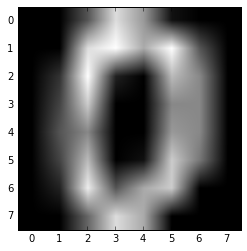

In [136]:
%matplotlib inline
import matplotlib.pylab as plt
plt.imshow(digits.data[0].reshape(8,8), cmap="gray")

In [137]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [138]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [147]:
clf.predict(digits.data[-2:-1])

array([9])

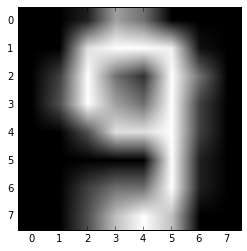

In [146]:
plt.imshow(digits.data[-2].reshape(8,8), cmap="gray")

## Exercise 3, 1 point

Read and understand http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

### Exercise 4, MPAA Rating predictor, 3 points

"The "body counts" for this site are mostly "on screen kills/deaths" or fatal/critical/mortal shots/hits of human, humanoid, or creatures (ie monsters, aliens, zombies.) The rule of thumb is "do they bleed" which will leave the concept of cyborgs somewhat open and decided per film. The human and creature counts should be separate. These will be added together for a final tally."

* Load Body Count dataset from https://figshare.com/articles/On_screen_movie_kill_counts_for_hundreds_of_films/889719
* See how it looks (data.head())
* Use Body_Count and Genre to predict if MPAA_Rathing == 'R' using LogisticRegression classifier (so this is **binary** classification)
* Achieve > 65% accuracy

Hint:
* Convert Genre to one hot encoded vector (so your final DataFrame will have columns Body_Count, IsRomance, IsAction, etc)
* This is how my table (X.describe()) looks after processing

    <img src="img/11/movie_count_processed.png">

In [1]:
import pandas as pd

In [11]:
X = pd.read_csv("/Users/kudkudak/Downloads/filmdeathcounts.csv")

In [14]:
X['Year']

2002

## Exercise 5 [OBLIGATORY VERY MUCH], Pick project, 0 points

Send me a project idea + team (<=3, suggested 2) before next laboratories. See project_ideas.ipynb